 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: Aidin Attar<br>
**ID Number**: 2048654


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [1]:
%matplotlib inline
import                                   csv
import matplotlib.pyplot     as          plt
import             numpy     as           np
import             scipy     as           sp
import           sklearn     as           sl

from               scipy import        stats
from             sklearn import     datasets
from             sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [2]:
# YOUR_ID, try also to change the seed to
# see the impact of random initialization on the results
IDnumber = 2048654
#IDnumber =      10
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [3]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print(              "Dataset Example:")
print(                dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:, -1].astype(  int) # last column contains the labels

Y = 2*Y-1                        # for the perceptron classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

# moved the permutation of the np.arrays X and Y to the next cell in order to include
# them in the control that makes sure there are at least 10 elements of each genre in
# the training set

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [4]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.

# boolean variable that remains false if there are not at least 10 elements
# of each genre in the training set
k = False

while k == False:

    # counter variables for the two genres
    cont_p = 0
    cont_n = 0

    # perform the permutation
    X = X[permutation]
    Y = Y[permutation]

    # m_test needs to be the number of samples in the test set
    m_training = int(0.75 * m)
    # m_test needs to be the number of samples in the test set
    m_test     = int(0.25 * m)

    # X_training = instances for training set
    X_training = X[:m_training]
    #Y_training = labels for the training set
    Y_training = Y[:m_training]

    # X_test = instances for test set
    X_test     = X[-m_test:   ]
    # Y_test = labels for the test set
    Y_test     = Y[-m_test:   ]

    # making sure the Y_training contains both 1 and -1
    for i in Y_training:
        if i == 1: cont_p+=1
        else:      cont_n+=1
    if cont_p >= 10 and cont_n >= 10:
        k = True

print(Y_training) # to make sure that Y_training contains both 1 and -1
print(    m_test)

print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print(      "Number of metal instances in test:", np.sum(Y_test== 1))

print("Shape of training set: " + str(X_training.shape))
print(    "Shape of test set: " + str(    X_test.shape))

[ 1  1 -1  1  1 -1  1  1  1  1 -1  1  1 -1 -1  1 -1  1 -1 -1 -1  1 -1 -1
 -1  1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1  1 -1 -1  1  1  1 -1
  1  1 -1 -1 -1  1  1 -1 -1  1  1 -1 -1 -1  1  1 -1  1  1 -1  1  1  1  1
  1  1 -1 -1  1 -1  1  1  1  1  1  1 -1  1  1 -1  1  1 -1  1 -1  1  1  1
  1  1 -1 -1  1 -1 -1 -1  1 -1  1 -1 -1  1 -1 -1  1  1 -1  1 -1  1  1 -1
  1 -1  1  1 -1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  1  1 -1  1 -1]
50

Number of classical instances in test: 27
Number of metal instances in test: 23
Shape of training set: (150, 3)
Shape of test set: (50, 3)


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [5]:
# Add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training, 1)), X_training))
X_test     = np.hstack((np.ones((m_test,     1)), X_test    ))

print("Training set in homogeneous coordinates:")
print(                           X_training[:10])

Training set in homogeneous coordinates:
[[1.00000000e+00 1.17453835e+02 5.01569949e-01 2.83687885e+03]
 [1.00000000e+00 6.15234375e+01 4.29974584e-01 2.38938800e+03]
 [1.00000000e+00 8.91029095e+01 1.98925769e-01 1.11810879e+03]
 [1.00000000e+00 9.93840144e+01 4.67757473e-01 2.44264558e+03]
 [1.00000000e+00 1.51999081e+02 4.76896884e-01 2.92283855e+03]
 [1.00000000e+00 1.61499023e+02 2.19015447e-01 8.11679647e+02]
 [1.00000000e+00 9.57031250e+01 5.16697528e-01 3.33873318e+03]
 [1.00000000e+00 9.57031250e+01 4.70335178e-01 2.69063999e+03]
 [1.00000000e+00 6.15234375e+01 4.29974584e-01 2.38938800e+03]
 [1.00000000e+00 1.51999081e+02 4.40919990e-01 2.74111811e+03]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [6]:
# A template is provided, but feel free to build a different implementation

def perceptron_update(current_w, x, y):
    # Place in this function the update rule of the perceptron algorithm
    return current_w + x*y

def perceptron(X, Y, max_num_iterations):
    # Place in this function the main section of the perceptron algorithm

    # init the algorith with w=0, use a best_w variable to keep track of the best solution

    # m-> number of training examples
    # n-> number of features
    m, n = X.shape

    curr_w      = np.zeros(n)
    best_w      = curr_w
    num_samples = m
    # current error for the cycle
    curr_error  = 1
    best_error  = curr_error
    # list to store the errors for each iteration in order to plot them
    errors      = []
    best_errors = []

    index_misclassified = -1 # will be ovewritten
    num_misclassified   =  0 # will be ovewritten

    # main loop continue until all samples correctly classified or max #iterations reached
    num_iter = 1

    # instead of using the following condition for the while I used a break to stop the
    # loop if all samples are correctly classified
    #while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
    while num_iter < max_num_iterations:

        # list to store the misclassified samples
        rand_index        = []
        num_misclassified = 0

        # avoid working always on the same sample, you can
        # use a random permutation or randomize the choice of misclassified
        permutation = np.random.permutation(len(X))
        X           =                X[permutation]
        Y           =                Y[permutation]

        for i in range(num_samples):
            # check if the i-th randomly selected sample is misclassified
            # store the number of randomly classified samples and the index of
            # at least one of them
            if Y[i] * np.dot(curr_w, X[i]) <= 0:
                num_misclassified += 1
                rand_index.append(i)

        # update  error count, keep track of best solution
        error = num_misclassified / num_samples
        if error < best_error:
            best_error = error
            best_w     = curr_w
        # store the errors and the best errors
        errors.append(          error)
        best_errors.append(best_error)

        # break the loop if all samples are correctly classified
        if num_misclassified == 0:
            print("There are no misclassified points. \n\nn_iter = ", num_iter)
            break

        # call update function using a misclassifed sample
        # update with a random misclassified point
        index_misclassified = rand_index[np.random.randint(0, len(rand_index))]
        curr_w              = perceptron_update(curr_w, X[index_misclassified],
                                                        Y[index_misclassified])
        num_iter += 1
    return best_w, best_error, errors, best_errors

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [7]:
#now run the perceptron for 100 iterations
w_found, error, errors, best_errors = perceptron(X_training,Y_training, 100)
print(w_found)
print("Training Error of perpceptron (100 iterations): " + str(           error))
print(                          "Misclassified points: " , int(error*m_training))

[-2.20000000e+01 -2.59556151e+03 -8.50522659e-01  2.10457826e+02]
Training Error of perpceptron (100 iterations): 0.18666666666666668
Misclassified points:  28


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [8]:
#now use the w_found to make predictions on test dataset
num_errors = 0

# compute the number of errors
for i in range(m_test):
    if Y_test[i] * np.dot(w_found, X_test[i]) <= 0:
            num_errors += 1

true_loss_estimate = num_errors/m_test  # error rate on the test set
#NOTE: you can avoid using num_errors if you prefer, as long as true_loss_estimate is correct
print("Test Error of perpceptron (100 iterations): " + str(true_loss_estimate))
print(                      "Misclassified points: " ,             num_errors )

Test Error of perpceptron (100 iterations): 0.16
Misclassified points:  8


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples)? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**
The two errors are comparable ($\sim 0.19$ vs $0.16$), in contrast with what we expected. Indeed since the the model is trained on the training set minimizing the loss function and making our model as optimized as possible. This may be caused by the smallness of the data set and an unfortunate choice of the seed: indeed repeating the procedure with different seeds brings a smaller error for the training set than the one of the test set. Furthermore the small amount of interations makes the results very unstable. However the multiple operations of randomization, not always based on the seed used, make the results different for every run. We can appreciate the error trend in the following plot:

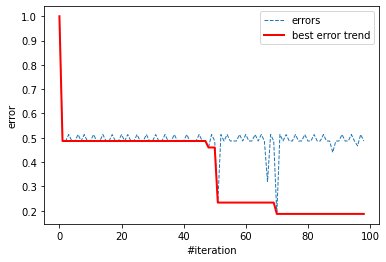

In [9]:
#plt.scatter(np.arange(len(errors)), errors, label = 'errors', color = 'C0', marker = 'x', s = 1)
plt.plot(np.arange(len(errors)), errors,
         label     = 'errors',
         color     =     'C0',
         linestyle = 'dashed',
         linewidth =        1)
plt.xlabel('#iteration')
plt.ylabel('error')
plt.plot(np.arange(len(best_errors)), best_errors,
         label     = 'best error trend',
         color     =              'red',
         linestyle =                '-',
         linewidth =                  2)
plt.legend()
plt.show()

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [10]:
#now run the perceptron for 4000 iterations here!

w_found, error, errors, best_errors = perceptron(X_training,Y_training, 4000)
print(                                                          w_found          )
print("Training Error of perpceptron (4000 iterations): " + str(error           ))
print(                           "Misclassified points: " , int(error*m_training))

num_errors = 0

# compute the number of errors
for i in range(m_test):
    if Y_test[i] * np.dot(w_found, X_test[i]) <= 0:
            num_errors += 1

true_loss_estimate = num_errors/m_test  # error rate on the test set

print("Test Error of perpceptron (4000 iterations): " + str(true_loss_estimate))
print(                       "Misclassified points: " ,             num_errors )

[-1.42000000e+02 -1.60491026e+04 -3.01066467e+00  9.98326029e+02]
Training Error of perpceptron (4000 iterations): 0.09333333333333334
Misclassified points:  14
Test Error of perpceptron (4000 iterations): 0.16
Misclassified points:  8


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples) when running for a larger number of iterations ? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**
In this case, as expected, the training error is almost always smaller than the test error, indeed, as said in the previous answer, the model is trained on the training error, minimizing the loss function, so it is to be expected this behaviour.
While the training error is significantly smaller in the case with 4000 iterations than the previous case, the test error doesn't show notewhorthy differences probabily due to the small dimension of the latter.

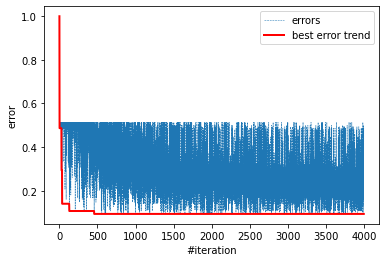

In [11]:
#plt.scatter(np.arange(len(errors)), errors, label = 'errors', color = 'C0', marker = 'x', s = 1)
plt.plot(np.arange(len(errors)), errors,
         label     = 'errors',
         color     =     'C0',
         linestyle = 'dashed',
         linewidth =      0.5)
plt.xlabel('#iteration')
plt.ylabel('error')
plt.plot(np.arange(len(best_errors)), best_errors,
         label     = 'best error trend',
         color     =              'red',
         linestyle =                '-',
         linewidth =                  2)
plt.legend()
plt.show()

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [12]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

header = next(music) # skip first line
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset Example:")
print(dataset[:10,...])

X = dataset[:,:-1].astype(float) # columns 0,1,2 contain the features
Y = dataset[:,-1].astype(int)    # last column contains the labels

Y = 2*Y-1                        # for the perceprton classical--> -1, metal-->1
m = dataset.shape[0]
print("\nNumber of samples loaded:", m)
permutation = np.random.permutation(m) # random permutation

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset Example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [13]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.

k = False
cont_p = 0
cont_n = 0
while k == False:
    X          = X[permutation]
    Y          = Y[permutation]

    m_training = int(0.75 * m)
    m_test     = int(0.25 * m)

    X_training = X[:m_training]
    Y_training = Y[:m_training]

    X_test     = X[-m_test:   ]
    Y_test     = Y[-m_test:   ]

    for i in Y_training:
        if i == 1: cont_p+=1
        else:      cont_n+=1
    if cont_p >= 10 and cont_n >= 10:
        k = True

print(      "Number of samples in the test set:",        m_test     )
print("\nNumber of classical instances in test:", np.sum(Y_test==-1))
print(      "Number of metal instances in test:", np.sum(Y_test== 1))

print("\nShape of training set: " + str(X_training.shape))
print(      "Shape of test set: " + str(    X_test.shape))

Number of samples in the test set: 50

Number of classical instances in test: 24
Number of metal instances in test: 26

Shape of training set: (150, 3)
Shape of test set: (50, 3)


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [14]:
# part on logistic regression for 2 classes
# a large C disables regularization
logreg               = linear_model.LogisticRegression(C=1e5)

# learn from training set
logreg.fit(X_training, Y_training)

# predict on training set
Y_pred_training      = logreg.predict(X_training)

# print the error rate = fraction of misclassified samples
error_rate_training  = 0

for i, j in zip(Y_training, Y_pred_training):
    #print(i, j)
    if i != j:
        error_rate_training += 1

error_rate_training /= m_training

print("Error rate on training set: " + str(error_rate_training))

#predict on test set
Y_pred_test          = logreg.predict(X_test)

#print the error rate = fraction of misclassified samples
error_rate_test      = 0

for i, j in zip(Y_test, Y_pred_test):
    #print(i, j)
    if i != j:
        error_rate_test += 1

error_rate_test /= m_test

print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.006666666666666667
Error rate on test set: 0.0


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [15]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list  = ['tempo', 'chroma_stft', 'spectral_centroid']
index_feature1 = 2 # Select the best 2 features according to your experiments
index_feature2 = 1 # Select the best 2 features according to your experiments
features       = [index_feature1,              index_feature2]

feature_name0  = features_list[features[0]]
feature_name1  = features_list[features[1]]

X_reduced      = X[        :, features]
X_training     = X_reduced[:m_training]
X_test         = X_reduced[   -m_test:]

print(X_reduced.shape)

(200, 2)


Now learn a model using the training data and measure the performances.

In [16]:
# learning from training data
logreg           = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_training, Y_training)

#predict on test set
Y_pred_test      = logreg.predict(X_training)

#print the error rate = fraction of misclassified samples
error_rate_test  = 0

for i, j in zip(Y_training, Y_pred_test):
    if i != j:
        error_rate_test += 1
error_rate_test /= m_test

print("Error rate on test set: " + str(error_rate_test))

Error rate on test set: 0.04


**TO DO** [Answer the following] Which features did you select and why ? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3**
The features selected were 'spectral_centroid' and 'chroma_stft'. Honestly I can't see a reason to exclude one of the three features, maybe the feature 'tempo' seems to be the one that characterize less between classical and metal music. The error rate on test set results in this way less than the ones we obtain using combination of the other features, meaning that the algorithm, using the three features, assignes to 'tempo' a small weight.

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

# ATTENTION!!
I had to increase the step size from 0.02 to 0.0325 for the first feature selected, because the size of the array we are using with the spectral centroid feature causes a out of memory error on my laptop that kills the kernel (for the other i mantained .02). Be careful if there are some ram eating processes active, it can lead to some freezing problems, at least for me (8Gb of RAM).

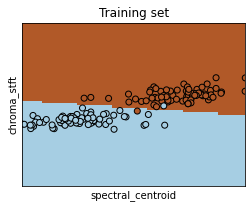

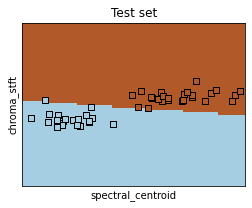

In [17]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook,
# it could be necessary to make some fixes to adapt to your implementation
h1 = .0325 # step size in the mesh
h2 = .02
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5

'''print(x_min)
print(x_max)
print(y_min)
print(y_max)

print('\n')
print(len(np.arange(x_min, x_max, h)))
print(len(np.arange(y_min, y_max, h)))
'''
xx, yy = np.meshgrid(np.arange(x_min, x_max, h1), np.arange(y_min, y_max, h2))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
# added shading = 'auto' to avoid a warning about deprecated behaviour
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading='auto')

# Plot also the test points
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [18]:
#needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg

import matplotlib.pyplot     as   plt
import             numpy     as    np
import             scipy     as    sp
import            pandas     as    pd
from               scipy import stats

In [19]:
#Import Data: Load the data from a .csv file

filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

#A quick overview of data, to inspect the data you can use the method describe()

dataDescription = stats.describe(Data)
#print(dataDescription)
print ("Shape of data array: " + str(Data.shape))


#for more interesting visualization: use Panda!
pdData = pd.read_csv(filename, delimiter = ';')
pdData

Shape of data array: (500, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,240
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,216
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,347
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,334
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.17899,0.0,9.69,0,0.585,5.670,28.8,2.7986,6,391,19.2,393.29,17.60,231
496,0.28960,0.0,9.69,0,0.585,5.390,72.9,2.7986,6,391,19.2,396.90,21.14,197
497,0.26838,0.0,9.69,0,0.585,5.794,70.6,2.8927,6,391,19.2,396.90,14.10,183
498,0.23912,0.0,9.69,0,0.585,6.019,65.3,2.4091,6,391,19.2,396.90,12.92,212


# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [20]:
#get number of total samples
num_total_samples = Data.shape[0]

print(    "Total number of samples: ", num_total_samples)

m_t               = int(num_total_samples*.7)

print("Cardinality of Training Set: ",              m_t)

#shuffle the data
np.random.shuffle(Data)

#training data
X_training = Data[:m_t, :-1]
Y_training = Data[:m_t,  -1]
print(   "Training input data size: ", X_training.shape)
print(  "Training output data size: ", Y_training.shape)

#test data, to be used to estimate the true loss of the final model(s)
X_test     = Data[m_t:, :-1]
Y_test     = Data[m_t:,  -1]
print(       "Test input data size: ",     X_test.shape)
print(      "Test output data size: ",     Y_test.shape)

Total number of samples:  500
Cardinality of Training Set:  350
Training input data size:  (350, 13)
Training output data size:  (350,)
Test input data size:  (150, 13)
Test output data size:  (150,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [21]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training)

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [ 0. -0.  0.  0. -0. -0. -0. -0.  0.  0.  0.  0. -0.]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test input data: [-0.04810514 -0.12133616  0.07228145 -0.08923508  0.05315889  0.06414062
  0.07997985 -0.17763439  0.03065888  0.04743419 -0.00588024  0.02236905
 -0.00144328]
Std of the test input data: [0.6643982  0.84316743 1.02315512 0.84213711 0.88348662 1.06912896
 0.89811036 0.86819172 1.03875207 1.0129713  1.1093203  0.97391045
 1.01142408]


# Model Training

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$
so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear


In [22]:
#compute linear regression coefficients for training data

#add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training  = X_training.shape[0]
X_trainingH = np.hstack((np.ones((m_training,1)),X_training)) # H: in homogeneous coordinates

m_test      = X_test.shape[0]
X_testH     = np.hstack((np.ones((m_test,1)),X_test))  # H: in homogeneous coordinates

# Compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_trainingH, Y_training, rcond=None)
print("LS coefficients with numpy lstsq:", w_np)

# compute Residual sums of squares
RSStr_hand  = np.sum((Y_training - np.dot(X_trainingH, w_np)) ** 2 )

print(       "RSS with numpy lstsq:\t\t\t\t", RSStr_np             )
print("Empirical risk with numpy lstsq:\t\t", RSStr_np  /m_training)

print(         "RSS with 'by hand':\t\t\t\t", RSStr_hand           )
print(     "Empirical risk 'by hand':\t\t\t", RSStr_hand/m_training)

LS coefficients with numpy lstsq: [224.89714286  -8.30958293   9.94577922  -0.36303426   9.98000589
 -15.24599718  28.03792283  -0.32255157 -30.53643785  27.05080466
 -23.02915463 -18.13803485  11.0089867  -39.44502066]
RSS with numpy lstsq:				 [739013.9420258]
Empirical risk with numpy lstsq:		 [2111.46840579]
RSS with 'by hand':				 739013.9420257995
Empirical risk 'by hand':			 2111.4684057879986


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [23]:
#compute predictions on training and test

prediction_training = np.dot(X_trainingH, w_np)
prediction_test     = np.dot(X_testH, w_np)

#what about the loss for points in the test data?
RSS_training        = np.sum((Y_training - np.dot(X_trainingH, w_np)) ** 2 )
RSS_test            = np.sum((Y_test - np.dot(X_testH, w_np)) ** 2 )

print(             "RSS on training data:\t\t\t", RSS_training           )
print("Loss estimated from training data:\t",     RSS_training/m_training)

print(                 "RSS on test data:\t\t\t",     RSS_test           )
print(    "Loss estimated from test data:\t\t",       RSS_test/m_test    )

RSS on training data:			 739013.9420257995
Loss estimated from training data:	 2111.4684057879986
RSS on test data:			 366017.06814984477
Loss estimated from test data:		 2440.1137876656317


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

The loss computed using the training set results significantly smaller then the one computed with the test set, as expected. However changing the seed to some unlucky number could lead to results in contrast with the prevoius sentence due to the smallness of the set.

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [24]:
from sklearn import linear_model

# build the LinearRegression() model and train it
LinReg = linear_model.LinearRegression()
LinReg.fit(X_training, Y_training)

print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

# predict output values on training and test sets
Y_pred_test     = LinReg.predict(X_test)
Y_pred_training = LinReg.predict(X_training)

# return a prediction score based on the coefficient of determination
print("Measure on training data:", 1-LinReg.score(X_training, Y_training))

Intercept: 224.89714285714317
Least-Squares Coefficients: [ -8.30958293   9.94577922  -0.36303426   9.98000589 -15.24599718
  28.03792283  -0.32255157 -30.53643785  27.05080466 -23.02915463
 -18.13803485  11.0089867  -39.44502066]
Measure on training data: 0.2520977162615886
